In [1208]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import math
import cmath
import scipy
import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy.special as special
import numpy.ma as ma
#np.set_printoptions(threshold=sys.maxsize)
pts = 5000 # number of iterator steps where neccessary
H_to_K = 1/0.000003166808534191 # conversion of Hartrees to Kelvin
H_to_GHz = 6579689.74479021 # conversion of Hartrees to GigaHertz
tol = 1e-6 # tolerance where neccessary

In [1210]:
R1 = 4.5 # starting posistion r1 in ao
R2 = 700 # ending posistion r2 in ao
dr1 = 0.02 # step spacing in ao

N_big = int((R2-R1)/dr1)
ipap_big = np.arange(1,N_big, 1.0)
R_grid = R1 + dr1*ipap_big

dr_test = 1
#r3 = 500

#dr3 = 0.02
#r4 = 700
#N1 = int((r2-r1)/dr1) # Number of grid points
#Np = int((r3-r1)/dr2) # Number of grid points


#ipap = np.arange(1,N1, 1.0) # indexing from the paper, given i = 1,2,...,N-1
#ipap_p = np.arange(1,Np, 1.0) # indexing from the paper, given i = 1,2,...,N-1
#ipap_pp = np.arange(1,Npp, 1.0)

#r = r1 + dr1*ipap
#rp = r1 + dr2*ipap_p
#rpp = r1 + dr3*ipap_pp
#print(len(rpp))


C12 = 3.05e8 # C12 coefficient in Eh*ao
C6 = 4710 # C6 coefficient in Eh*ao
C6p1 = 4e6 # C6' coefficient in Eh*ao
C6p2 = 5e6 # C6'' coefficient in Eh*ao
C6p3 = 3.6e6 # C6' coefficient in Eh*ao
C6p4 = 4.2e6 # C6'' coefficient in Eh*ao
C3_1 = 20 # C3 coefficient in Eh*ao
C3_2 = 20 # C3 coefficient in Eh*ao
C3_3 = 25 # C3 coefficient in Eh*ao
C3_4 = 17 # C3 coefficient in Eh*ao

VLJ = (C12/(R_grid**12)) - (C6/(R_grid**6)) # standard Lennard-Jones interatomic potential
VE1 = (C6p1*(1/(R_grid**6))) - (C3_1*(1/(R_grid**3))) # 1st excited state
VE2 = (C6p2*(1/(R_grid**6))) - (C3_2*(1/(R_grid**3))) # 2nd excited state
VE3 = (C6p3*(1/(R_grid**6))) - (C3_3*(1/(R_grid**3))) # 1st excited state
VE4 = (C6p4*(1/(R_grid**6))) - (C3_4*(1/(R_grid**3))) # 2nd excited state

Eo = 3.166808534191e-12 # inital particle energy, 1uK in Hartrees
me = 9.1093837e-28 # electron mass in grams
mrb_g = 1.4192261e-22 # rubidium mass in grams
mrb = mrb_g/me # rubidium mass in au
mu = (mrb**2)/(2*mrb) # reduced mass of rubidium
hbar = 1.0546e-27 # reduced Planck constant in cgs
e = 4.8032e-10 # electron charge in cgs
ao = (hbar**2)/(me*e**2) # Bohr radius in cgs

In [1212]:
scattering_lengths = [23.118272010998865, 23.294772927224223, 23.47102188863188, 23.647187978773193, 23.823426831925502, 23.999405940636574, 24.17522106780508, 24.35119330384819, 24.52683040828181, 24.7025339096497, 24.87794230404325, 25.05351626848902, 25.22866799412433, 25.403976102477202, 25.57906016985038, 25.75399709786118, 25.929167925228914, 26.103819650298952, 26.278536474522717, 26.45327416041281, 26.627741622053176, 26.80232713591603, 26.97670560569878, 27.150975587506338, 27.32525972628038, 27.499381777965485, 27.673407128668362, 27.8474624862435, 28.02125296431039, 28.195077301795596, 28.369020984121608, 28.542667703266964, 28.71626195545282, 28.889754036799854, 29.063166197506348, 29.23663270593716, 29.409967512225727, 29.58322412500383, 29.75640860290315, 29.92941160637291, 30.10255113717957, 30.27549038983977, 30.44842566036709, 30.621256088261728, 30.79404420921181, 30.966989091694167, 31.1396226921441, 31.312066910925818, 31.484642482774664, 31.657168637453758, 31.829651905110833, 32.002217936282825, 32.17444364199891, 32.34683304219149, 32.51915756915785, 32.69132434952043, 32.86349293064404, 33.03555535718583, 33.2076821838651, 33.37981994201011, 33.55178498115053, 33.72364702121798, 33.89558794615671, 34.06747038457139, 34.23934762347775, 34.411242159474796, 34.58286525924613, 34.75476597250081, 34.92633791407633, 35.097919488316066, 35.26971941788882, 35.441306012427425, 35.61279034934069, 35.78446559446213, 35.95593859217163, 36.12741394499274, 36.298893073243335, 36.47027625973313, 36.64178563524377, 36.81327460029353, 36.984592972221705, 37.15597820251114, 37.327432357469185, 37.49869894828373, 37.67017406870815, 37.84135303385856, 38.01267920872173, 38.18383532720373, 38.35513066430979, 38.52646312079771, 38.69769165337334, 38.86900319497565, 39.04019596368168, 39.21140638224471, 39.38264848829809, 39.553947811461974, 39.72514058158485, 39.896381690168454, 40.06766353900581, 40.2387449989234, 40.41013760710065, 40.581430408594464, 40.75260375087729, 40.92387031175787, 41.09503991429578, 41.26638722669598, 41.437743742678315, 41.60900608802441, 41.78011456698394, 41.95154298408575, 42.12278994292378, 42.294186207944264, 42.46551337992609, 42.636771444429314, 42.80828780083513, 42.97964152500535, 43.15107859025443, 43.32256325643795, 43.49407269700353, 43.665562352584644, 43.83710418513231, 44.00859104756528, 44.18019295750647, 44.35168758463926, 44.52349421527677, 44.69505978709487, 44.866665289035, 45.038462305354386, 45.210245905575874, 45.38193388380732, 45.55385219835375, 45.725707973300125, 45.897579954724314, 46.06954589471267, 46.24136466558431, 46.413495368318785, 46.585684298748504, 46.75771701107093, 46.929879207625035, 47.10205413312046, 47.27429362298639, 47.44661030869783, 47.6190577459816, 47.791436226211154, 47.9638141158306, 48.136273535677375, 48.308898004865185, 48.481528333576904, 48.654172680446585, 48.82681828281923, 48.99970326818758, 49.17234711541183, 49.34531654893292, 49.518282973273315, 49.69133604312737, 49.86444401929589, 50.03758544601891, 50.21079925542494, 50.384125120181245, 50.55746404066555, 50.730873179721485, 50.90442623076172, 51.07789548297257, 51.25146611582972, 51.42533340610605, 51.59909512141471, 51.77298386885807, 51.94697594737338, 52.121015532889466, 52.295133341549416, 52.46933995274364, 52.64355778351915, 52.8178779639753, 52.99233187837786, 53.16688432660543, 53.341461397909434, 53.516256784650636, 53.69097897789195, 53.865891866767484, 54.040771622076285, 54.215898079882486, 54.39120003515682, 54.566355560053296, 54.74169634880903, 54.91712689144703, 55.09271839801969, 55.26849972158205, 55.44421536477019, 55.62007345970823, 55.79596978515556, 55.971992389262, 56.14829753950286, 56.32457541751693, 56.500934129335015, 56.67745881586173, 56.8540064623882, 57.03077847978694, 57.207594573966894, 57.384553650356494, 57.56164319104755, 57.73882889498723, 57.91620096694365, 58.09363329231044, 58.27128620731086, 58.44885407768607, 58.62672866319602, 58.80455030770615, 58.98280067160782, 59.160861769206285, 59.3391732922414, 59.517552107388966, 59.69616887145585, 59.87489661080523, 60.053810251430825, 60.23273123834682, 60.41188041795604, 60.59111734211227, 60.77052522465539, 60.950011226682875, 61.12972289469967, 61.30964811241649, 61.489569656951076, 61.66972039836081, 61.849905847660615, 62.03028227054083, 62.210970038947934, 62.39172491798609, 62.572472474162524, 62.753547284342844, 62.93483718263248, 63.11605097126742, 63.29748646974467, 63.47924446759859, 63.66107805080651, 63.84297484663864, 64.02527229335278, 64.20742225000143, 64.39000407725736, 64.57258765490691, 64.7554159941386, 64.93836923601212, 65.12157930190341, 65.30496191598527, 65.48840264026727, 65.67207623440962, 65.85592451406795, 66.04000728768663, 66.22419354984343, 66.40870124586922, 66.5932263403548, 66.77800899461002, 66.96307243052092, 67.1481987903036, 67.3334525705659, 67.51904644890355, 67.70469200568667, 67.8906841298208, 68.0767439436979, 68.26311869438214, 68.4496781800363, 68.63637801428723, 68.82318971906008, 69.0104756303178, 69.19771041884007, 69.38528186019269, 69.57300490850893, 69.76093081074649, 69.94914125232991, 70.13754727444304, 70.32607389072827, 70.51490675160032, 70.70384519818056, 70.89316117678761, 71.0825348091728, 71.2723299217323, 71.46224020094407, 71.65233272234534, 71.84276090138711, 72.03333268976742, 72.2241084105613, 72.41509002659225, 72.6065425516525, 72.79803341002916, 72.98965183534031, 73.18171671595832, 73.37398120443287, 73.56644018780068, 73.75918250869071, 73.95216055812233, 74.14532550325508, 74.33880420392344, 74.53261035966176, 74.72650524402944, 74.92068990242596, 75.11520399770173, 75.30997577183402, 75.50486890029387, 75.70007089792391, 75.89573731788849, 76.09141019545909, 76.28749382502289, 76.48381063254715, 76.6803633451538, 76.87724800614954, 77.07445017930279, 77.27180026926779, 77.46943518848005, 77.66742852090927, 77.86572104105558, 78.06420429702162, 78.26305869613019, 78.46214001883551, 78.66161925673607, 78.86116384712739, 79.06113799145052, 79.26140821043681, 79.46192509549937, 79.66290023413917, 79.86402169340887, 80.06547397066879, 80.26722683559419, 80.46928664908184, 80.6717397725811, 80.87432934994486, 81.07740064714498, 81.28075503192909, 81.48431393282713, 81.68830905734521, 81.89263346233895, 82.0971148202143, 82.30206717920099, 82.50726084405599, 82.7128894813491, 82.91875411354194, 83.12507822143947, 83.33154143151143, 83.5384902558376, 83.74573751917066, 83.9533214816129, 84.16122568824706, 84.36946330142001, 84.57810726069792, 84.78713434379239, 84.9963383941621, 85.20612953863252, 85.41606533631965, 85.6266469475012, 85.83726823384346, 86.04840912570482, 86.25988032579866, 86.4717905540894, 86.68392497341317, 86.89661165585967, 87.10954859696952, 87.32289389173012, 87.53662738753466, 87.75078890045509, 87.96524089024582, 88.18007063117892, 88.39550137261027, 88.61110139395797, 88.82714108499802, 89.04357797026064, 89.260435316974, 89.47762055568494, 89.69540096160773, 89.91339159622703, 90.13192145704305, 90.3507968375466, 90.57004843408711, 90.7897883312792, 91.00993915872351, 91.23041587122522, 91.45144355225322, 91.67293950305299, 91.89471914432046, 92.1170557543436, 92.33972894980464, 92.56287685308988, 92.78645528985587, 93.01048957833027, 93.23500718122291, 93.45989034061789, 93.68536208128683, 93.91106522003116, 94.13744386190392, 94.36412718360208, 94.5913875158466, 94.81912116710033, 95.04718984007587, 95.27584573758193, 95.50495585457213, 95.73451452894365, 95.96456857398636, 96.19514903415367, 96.42616234290506, 96.65764762916454, 96.88963404970397, 97.12217558703003, 97.35521332915766, 97.5886517388549, 97.82270908127227, 98.05722095831402, 98.29228077210274, 98.5278830998122, 98.7639493459056, 99.00049746081558, 99.23752021437696, 99.47521339953954, 99.71328989994439, 99.95208422470142, 100.19134592916548, 100.43104531664787, 100.67144130309964, 100.91230622506303, 101.15371362542943, 101.39561378627815, 101.63822176982659, 101.88119308300816, 102.12487700564296, 102.36918290068789, 102.61397267955284, 102.85939829896374, 103.10524724921449, 103.35181761386981, 103.59897970980644, 103.84670058926837, 104.09493871544429, 104.34384963903183, 104.59341541890677, 104.8434283429498, 105.09415511474675, 105.34547932894975, 105.59746740026398, 105.85000715155684, 106.10315145212341, 106.3570002951303, 106.61143322629988, 106.86654289703117, 107.12229077321811, 107.3786649488414, 107.63563245289716, 107.89332869144755, 108.15162294875095, 108.41057548177149, 108.67025452148368, 108.93063003426207, 109.19155917674071, 109.45323610003034, 109.71559945472953, 109.9786187733818, 110.24235946433897, 110.50676593544296, 110.77182788602627, 111.03780732277937, 111.30420029093358, 111.57145587581938, 111.83946992022017, 112.1080471480115, 112.37753187911058, 112.64762214211821, 112.91852290231864, 113.19015484290397, 113.46245886935077, 113.73561109006476, 114.00956085687928, 114.28408460498291, 114.55947036046423, 114.83566969554754, 115.1125995477344, 115.39031599561852, 115.66879532191645, 115.94809104123968, 116.22816996933143, 116.50907951790127, 116.79074716884759, 117.0732375382828, 117.35650914483756, 117.64062083001913, 117.92568482741157, 118.21133154165472, 118.49811142077365, 118.78549016264859, 119.07390358541738, 119.36304160453051, 119.65306819077921, 119.94401926719185, 120.23567792362455, 120.52844874463193, 120.82187972668744, 121.11638065888533, 121.41169205574249, 121.70783787502012, 122.00502953943501, 122.30304390715385, 122.6019516956358, 122.9018553730877, 123.20271935850627, 123.50438817612377, 123.80717348019044, 124.11075471193642, 124.4154009182975, 124.72093996865134, 125.02741241379562, 125.33498696610036, 125.64340119311066, 125.9529168109277, 126.26343848697906, 126.57486225347729, 126.88734452410905, 127.20085098784168, 127.51538334331484, 127.83098545734667, 128.14753025790756, 128.46516949275986, 128.78391750470107, 129.10359701768232, 129.42444666441477, 129.74638296105894, 130.0693219049789, 130.39334227791363, 130.718564566792, 131.04475070529014, 131.37213715013593, 131.70060055974682, 132.0302587467502, 132.3610140085759, 132.69292500559325, 133.02594250648332, 133.36017090304904, 133.6955380304609, 134.03213555152777, 134.36983885380846, 134.70878880965756, 135.04883543953753, 135.3902402607889, 135.73280308899064, 136.07652979456196, 136.4215457303676, 136.7678244807327, 137.11537036081722, 137.46416642022916, 137.81418042371286, 138.16552711695033, 138.51813083825283, 138.87206369113147, 139.22730031271732, 139.58384563928755, 139.94177429533173, 140.30096736703638, 140.6615206546726, 141.0233791515743, 141.38671251993597, 141.751396178956, 142.11741744497553, 142.4849060515085, 142.8537543771084, 143.22401161410693, 143.59573503598241, 143.968939690748, 144.3435074236211, 144.71953995493834, 145.09704112429864, 145.47605621594758, 145.85658652936021, 146.23859189686792, 146.62213205322612, 147.00721992871584, 147.39374852215533, 147.78193777227796, 148.17164902490376, 148.5629433825438, 148.95583140138308, 149.35030598297033, 149.74639283778785, 150.144095431761, 150.5434830712723, 150.94444776352142, 151.34715855447655, 151.75146781554002, 152.15751877517548, 152.56529419897262, 152.9747421579455, 153.38595864023802, 153.7989029111037, 154.21354248182476, 154.6299808514519, 155.04819761510726, 155.46816829292473, 155.89005340820168, 156.31373852501326, 156.73924004074738, 157.16659963988616, 157.5958315613863, 158.02695688265717, 158.4599549078125, 158.89493639945547, 159.33179503980915, 159.77059422155003, 160.21145127210582, 160.6541391726049, 161.09888779396093, 161.54568067946954, 161.99445963235704, 162.44534093578517, 162.89826727504771, 163.3533015466953, 163.81032859530677, 164.26951485686004, 164.73084861184418, 165.19430668774962, 165.65990983131434, 166.12778005570698, 166.59785392965782, 167.0700746200921, 167.54455976234155, 168.02133806539516, 168.50037275514953, 168.98167634366882, 169.46531831642508, 169.95130323725002, 170.43966500373716, 170.93038768136898, 171.4234972610499, 171.91907872831985, 172.41704005430307, 172.91751418915462, 173.42044189087588, 173.92589979773496, 174.43383132095315, 174.94438324484221, 175.45743212897014, 175.97309906558914, 176.49140272107118, 177.01237284253872, 177.53596729262142, 178.06223194258314, 178.59123567574903, 179.12293922524933, 179.65748075083812, 180.19479085999444, 180.73484518800595, 181.27779362065007, 181.82359191698427, 182.37227349891992, 182.92389654065673, 183.47845634852214, 184.03597215396198, 184.59650086789702, 185.16001331516057, 185.7266139930158, 186.29624623122567, 186.86902987458268, 187.44497338229763, 188.02408456824497, 188.6063671037772, 189.19189096788878, 189.78065434197788, 190.3727312931984, 190.96811299955328, 191.56689859570366, 192.16900328467227, 192.77453269960324, 193.38353896652146, 193.99604551998456, 194.61199272112398, 195.23156402452628, 195.85474495943922, 196.4814983680423, 197.11191269551293, 197.74601039192135, 198.3838803855273, 199.02548982428817, 199.6709293649298, 200.3202104759662, 200.97335929578335, 201.63045557733471, 202.29150621630168, 202.95652647041868, 203.6256200360643, 204.2987900559871, 204.97606445369792, 205.65752221476214, 206.34318587189583, 207.03309499530937, 207.72733178122164, 208.42592965010363, 209.12883086137856, 209.83622926524214, 210.54809625506937, 211.2644985101675, 211.9854538600453, 212.71108456742434, 213.44129238188287, 214.17633705724464, 214.91606088580698, 215.66066565827654, 216.41012321807173, 217.16451760134578, 217.92389214334602, 218.68834450123347, 219.45780090030235, 220.2324884899448, 221.01234046171055, 221.7974745247777, 222.5879227784538, 223.383748838313, 224.18501409889672, 224.9917785234283, 225.80411783993637, 226.62209882228146, 227.4457469410248, 228.27512471102486, 229.11040957037906, 229.95150699536197, 230.79861116465756, 231.65165878351775, 232.51089994809035, 233.37625354106018, 234.24785073433762, 235.12577480558434, 236.01007102508476, 236.90082731920378, 237.79813413889616, 238.7020178808438, 239.61262536744965, 240.53003551142518, 241.45423623170484, 242.38542249944152, 243.3236481183189, 244.2689658414395, 245.22145835949183, 246.18125540138075, 247.148442083059, 248.12306292777384, 249.10524796017222, 250.09511674116058, 251.0927139122345, 252.0981619382635, 253.1115545977546, 254.1329966692117, 255.16260158650948, 256.2004681741267, 257.24668950260747, 258.3013656912495, 259.364628209206, 260.43659968882326, 261.5173521258456, 262.6070630940786, 263.70580626822783, 264.8136551586426, 265.9308386490494, 267.05739257064386, 268.19349934388634, 269.33927288820536, 270.49480614656574, 271.6602937289903, 272.83585792670533, 274.0215954334499, 275.2176578305826, 276.4242331940389, 277.64142965752916, 278.8693834666248, 280.1082964275934, 281.35828651432837, 282.61950000452697, 283.89211932319233, 285.1763273691477, 286.47222778454676, 287.78007271928504, 289.0999741385099, 290.43211569889286, 291.77670875119344, 293.1339053631286, 294.50388419484966, 295.8868636885036, 297.28304027744343, 298.69260419682115, 300.11574314178665, 301.55266650655904, 303.0036039780829, 304.4687594432814, 305.9483566705865, 307.4425997617436, 308.9517553578037, 310.47602799217464, 312.01563048080806, 313.5708649184339, 315.14194727254255, 316.729118893976, 318.33269122167496, 319.95285718822515, 321.58995044223445, 323.24420750694463, 324.91592185364846, 326.6053716008108, 328.31287064562576, 330.03872145401374, 331.78322158245004, 333.5466685209112, 335.3294150056412, 337.1317865004599, 338.9541045527723, 340.79670868224576, 342.65998449828413, 344.5442639009616, 346.449925834164, 348.3773526921678, 350.3269203657878, 352.29902283242967, 354.29410094449776, 356.31252250654154, 358.3547436030398, 360.42119272526844, 362.5123058783751, 364.62854808325574, 366.7703963459286, 368.93832645093676, 371.1328335633886, 373.35442128713595, 375.6035934884792, 377.88089430501776, 380.1868827251846, 382.5221121930702, 384.88713529655894, 387.28256876359586, 389.70899959737164, 392.16706092071075, 394.6573773180564, 397.1806076238643, 399.73744812392505, 402.32855510436355, 404.9546629207514, 407.6164899138372, 410.3147993770568, 413.05034644210775, 415.82393822980504, 418.63638467336705, 421.4885317178505, 424.38122970227215, 427.31538724718445, 430.2919120606366, 433.3117564324622, 436.37586881340843, 439.4852697940313, 442.6409851302623, 445.84407253289777, 449.0956391371742, 452.3968057345465, 455.7487312688604, 459.15263128663867, 462.60973406992605, 466.1213328288401, 469.68872373278265, 473.3132954014205, 476.9964464824424, 480.73962872497964, 484.5443471155154, 488.4121534234504, 492.3446729254882, 496.3435423474856, 500.4105000026625, 504.54731793428437, 508.75583013484794, 513.0379579304761, 517.3956742471688, 521.831028545496, 526.3460963387478, 530.9431689270751, 535.6244552565917, 540.3923535960797, 545.2492630292004, 550.1978447182789, 555.2406405714753, 560.3804608209905, 565.6201193922406, 570.9626188550684, 576.4110948582507, 581.9686493209208, 587.6387178001116, 593.424855648743, 599.3304958098528, 605.3595353643889, 611.5159720060817, 617.8038377881661, 624.2274728167076, 630.7913633124151, 637.5001871755959, 644.3588121049003, 651.3723999506923, 658.5462966378847, 665.8860948137894, 673.397693026593, 681.0871821637487, 688.961053440038, 697.0260908862074, 705.2893232031622, 713.7582879775642, 722.4407413087895, 731.344954318431, 740.4795195894663, 749.8537369362327, 759.4770890886831, 769.3596424297132, 779.512187351771, 789.9459170480009, 800.6728011376113, 811.7055022504195, 823.0572706808066, 834.7422021136725, 846.7753425528714, 859.1725260223501, 871.9505785794431, 885.1274511448071, 898.7223316211471, 912.7550437881632, 927.2476600599454, 942.2233376713924, 957.706073685038, 973.7229680558817, 990.3016249758011, 1007.4730169344892, 1025.2682706890932, 1043.72395143604, 1062.8754870922228, 1082.7647672040016, 1103.4350909058326, 1124.9328828794498, 1147.3102008333549, 1170.6210444477445, 1194.9267374785024, 1220.2895945466632, 1246.7833765709042, 1274.483809818323, 1303.4764744523654, 1333.8527378827032, 1365.7159253751222, 1399.1798877799195, 1434.3618975818345, 1471.406470501572, 1510.4592963631108, 1551.6863520747145, 1595.2802920501192, 1641.4605120830197, 1690.4479235792119, 1742.510648737232, 1797.9523264909199, 1857.1106333673079, 1920.3742185893047, 1988.1847754503342, 2061.0526120272407, 2139.563295209347, 2224.402313124711, 2316.3671157058475, 2416.397120959136, 2525.590370424556, 2645.282559874489, 2777.057281452176, 2922.8530876535683, 3085.040468632654, 3266.482620779692, 3470.916435125633, 3702.983187026742, 3968.6571224301915, 4275.846836950877, 4635.072275896211, 5060.881890377108, 5573.4808882408415, 6202.621760052971, 6993.107048492643, 8016.120453958647, 9391.717134045519, 11341.510363670053, 14316.242740615904, 19418.95812763317, 30187.673964690628, 67930.85046869452, -269652.6174290021, -45124.916832271294, -24603.120603474403, -16905.4596077338, -12873.305370987267, -10390.119534129384, -8708.466128171483, -7493.761850438987, -6575.169763392489, -5856.230101703819, -5278.297690674371, -4803.5608362236535, -4406.5769548575345, -4069.7471683956105, -3780.3515662799314, -3529.0222061102936, -3308.7045580244408, -3113.9921427462714, -2940.70589300862, -2785.4404783416985, -2645.529112108226, -2518.82491815703, -2403.5339020068045, -2298.161139947846, -2201.5072613256925, -2112.508664272709, -2030.3190486009535, -1954.1434143614872, -1883.3835333865368, -1817.4545377066447, -1755.8976447960151, -1698.2678562714593, -1644.2111982641727, -1593.4496861968728, -1545.6182665351694, -1500.5033840301744, -1457.8838611632568, -1417.547299723827, -1379.320169966627, -1343.0465976347807, -1308.5701044729267, -1275.7643499662956, -1244.509164044983, -1214.6960158240904, -1186.2389684075422, -1159.0319441516922, -1133.0059540199818, -1108.0751508981452, -1084.1763992476078, -1061.2474401966854, -1039.2331085938013, -1018.0714076142697, -997.7221147626933, -978.1354467033509, -959.2673607907614, -941.0825510270405, -923.5426619502565, -906.6121055497671, -890.2659457900407, -874.4657040499083, -859.1880866335484, -844.4100137851597, -830.1061462215883, -816.2532914595674, -802.8297567306535, -789.8144686295537, -777.19279175293, -764.9435174713329, -753.0514038520118, -741.5023228179949, -730.2823667996705, -719.3722416472583, -708.766923523695, -698.4466193732518, -688.4053254709263, -678.6287107811257, -669.1065665684241, -659.8304484850371, -650.7893665937958, -641.9754925656756, -633.3796878001408, -624.994402498602, -616.8124678851411, -608.8250439309627, -601.0259058220403, -593.4106464367371, -585.9685048978802, -578.6968853610825, -571.5872722414833, -564.637606433899, -557.8391554722815, -551.1897620147847, -544.6834461451848, -538.3152166561904, -532.0801726518403, -525.9766989904431, -519.997717904027, -514.1401518629976, -508.4027697750719, -502.7779281149728, -497.26564212220694, -491.8602571278768, -486.55937463556177, -481.35945372509667, -476.2583010986283, -471.2581648130979, -466.34462717606, -461.52382285615096, -456.7923653507047, -452.14445298897635, -447.5815127279801, -443.1000856456644, -438.69592476774915, -434.36866629712193, -430.1175009096542, -425.9381858967624, -421.8295035829045, -417.79088581666355, -413.81906745315587, -409.9129584360428, -406.07144064516626, -402.2918403256368, -398.5736751857007, -394.9141877744155, -391.31333962184004, -387.768611152201, -384.2800047701812, -380.84471625690446, -377.46179022948525, -374.13105760681236, -370.8505381996558, -367.61923388050235, -364.43542002040084, -361.29892135252663, -358.2078758373728, -355.16156468757373, -352.1598279177031, -349.201305753872, -346.28390094324305, -343.40904921562634, -340.5729408500822, -337.77628910063567, -335.01873070716954, -332.29860369636333, -329.61561309802954, -326.9684907499824, -324.3575999662402, -321.7798818713027, -319.2373412757432, -316.7275591929478, -314.2507833855701, -311.80604274700465, -309.3925995504078, -307.01005577247, -304.6574903557495, -302.334676195435, -300.0410973296089, -297.7753499973563, -295.5377434242621, -293.3274645580023, -291.14428758678235, -288.9873328377989, -286.8560094482357, -284.7503655406073, -282.66977733329037, -280.6139412538206, -278.5817431698471, -276.57309472954546, -274.5879482293409, -272.6251964411057, -270.6852506041117, -268.7670969267499, -266.87038640921065, -264.99520338624274, -263.14112681513126, -261.30679000935595, -259.49308382898386, -257.69960501937663, -255.92497456981008, -254.16974583195955, -252.43367535519022, -250.71477970225382, -249.01582358176572, -247.33347157610373, -245.6699768111915, -244.02237886471096, -242.39363585726036, -240.78039617507224, -239.18382334338415, -237.60379741892288, -236.03953452988597, -234.49141490256338, -232.95811089032972, -231.44109406801584, -229.93883966377058, -228.45048620301313, -226.97764145229272, -225.5184811205125, -224.07379002409996, -222.64332864953286, -221.22587125131247, -219.82226426104128, -218.43219804303473, -217.05503045701005, -215.69075696691056, -214.3395385913439, -213.00044250999144, -211.67410657763128, -210.35938299008308, -209.0575623521798, -207.76670214895623, -206.48789754466662, -205.22030718865616, -203.96440008117503, -202.71960034490982, -201.48563288464067, -200.2625757597327, -199.05031796663732, -197.8486712205892, -196.65765666532445, -195.47616100160957, -194.30538064023713, -193.1451668973117, -191.9941990689904, -190.85268525520513, -189.72102692143926, -188.5991327133485, -187.48627460623942, -186.38263810251885, -185.28827928248816, -184.20314431635057, -183.12666548426455, -182.05878237027108, -180.99972277120239, -179.94918138213046, -178.90702094200807, -177.87308212049538, -176.84756280445706, -175.83021924171325, -174.8205607629576, -173.81915509460688, -172.8253411174882, -171.83913625055501, -170.86067576903346, -169.89005130419017, -168.9266395232927, -167.97002187090163, -167.02156491637876, -166.08002401913555, -165.14502293138122, -164.21746479016642, -163.29677457135682, -162.38279845870005, -161.47567327402112, -160.57538022809933, -159.68150167794326, -158.7942224327941, -157.91315162156852, -157.03857006537106, -156.17058119259718, -155.30796195757537, -154.4526389153739, -153.60244992902412, -152.75867878898276, -151.9208607195155, -151.0888134303282, -150.26227268536053, -149.44167041683224, -148.62675317489092, -147.81789993917147, -147.01385878051119, -146.21593983813716, -145.42288815057796, -144.63541224158237, -143.8532521894706, -143.07635234533592, -142.30442463668933, -141.5381539967825, -140.77651662784274, -140.02008014661575, -139.26820733516817, -138.52183136726632, -137.78010120431156, -137.04329418510608, -136.3107844866878, -135.58371476389058, -134.860343468367, -134.1425096442706, -133.4287465965044, -132.71962062477616, -132.01483078743811, -131.31479990032315, -130.61888868672116, -129.9271114411875, -129.239614789491, -128.556761284474, -127.87791299628323, -127.20312518803806, -126.53251452735188, -125.86609779144233, -125.20377605187454, -124.54543002217255, -123.89040897137698, -123.23990471159613, -122.5935363708704, -121.95035114444246, -121.31110462225001, -120.67591269928657, -120.04427965593662, -119.41625421405314, -118.79198954746461, -118.17115989084398, -117.55400749922802, -116.9405169789717, -116.3302665235725, -115.72375428726377, -115.12057303150961, -114.5208855086528, -113.92447412158477, -113.33144574602913, -112.74163508234803, -112.1550505824109, -111.57196866442831, -110.99198093566709, -110.41539710414995, -109.84175024299272, -109.27125011079882, -108.7039419107052, -108.13950505331961, -107.57835477490933, -107.01984949211027, -106.46449279556143, -105.91257486212027, -105.3632820274779, -104.81681025557121, -104.27334903816626, -103.73230977056927, -103.19456228424794, -102.65943615225943, -102.1272731309149, -101.59763033576071, -101.07097004379582, -100.54660521692034, -100.02551996026249, -99.50686385254902, -98.99056550426813, -98.47693937180134, -97.96611183924193, -97.45773381095839, -96.95214369411084, -96.4487515842532, -95.94822631866901, -95.44920041679393, -94.9541803698146, -94.46039248497365, -93.96930607089674, -93.48071898849507, -92.99470289230652, -92.51046056024082, -92.02938699517046, -91.54992435936168, -91.07296293812921, -90.59839895851263, -90.12618026884732, -89.65587946351964, -89.18809416478335, -88.72207319796762, -88.25883797068478, -87.79738619466043, -87.33789270461473, -86.88105234229174, -86.42607158895986, -85.97290165935513, -85.52215399491365, -85.07349235050528, -84.62669781466164, -84.18199740256026, -83.73931044788549, -83.29870884720431, -82.85996669908748, -82.42338351556688, -81.98818210522094, -81.55557024368004, -81.12464417510492, -80.69554369406447, -80.26843957199918, -79.84298760582308, -79.41945490772127, -78.99800964608528, -78.57808578021647, -78.16027874819564, -77.74394358462133, -77.32943078277816, -76.91701879869392, -76.50616044632392, -76.09703433820741, -75.68957386495141, -75.28396973990363, -74.87979700529165, -74.47773363052934, -74.07711765456615, -73.678002681973, -73.28054686513784, -72.88492643359596, -72.49098593113506, -72.09864405822562, -71.70783680566048, -71.31860597070775, -70.9308383344926, -70.54473144409121, -70.16004411038308, -69.77716105504334, -69.39567222455136, -69.01578072868266, -68.63732046428727, -68.26021537893861, -67.88468043845393, -67.51094307547336, -67.13832732488332, -66.76707240008761, -66.39751074336397, -66.02932225669535, -65.66253170019398, -65.29702347577125, -64.93316198392455, -64.57044582777247, -64.20910717668997, -63.84925855861957, -63.49092491507752, -63.13373586765101, -62.77802013462969, -62.42331719999611, -62.07033891790143, -61.71838245867469, -61.367933293880704, -61.01872995377777, -60.67060995896152, -60.32376792264038, -59.978344416683726, -59.63430446938437, -59.29140144384427, -58.94949626992271, -58.60939217929087, -58.269924264783064, -57.931818534851296, -57.59503433486955, -57.25933821111221, -56.924770363257686, -56.591860535491676, -56.25969210823263, -55.928613425080535, -55.598751016901105, -55.27027606553085, -54.94275666147781, -54.61635425237604, -54.290995960313, -53.96693637247509, -53.643848160224664, -53.321971657400454, -53.000924344835035, -52.68132983728528, -52.36246588564317, -52.04496216897542, -51.728329154568186, -51.41292860941971, -51.09852987983701, -50.7850603202779, -50.47259577032995, -50.16128469790926, -49.85098012922283, -49.54153551779171, -49.233489824466666, -48.92601780783003, -48.6197595236205, -48.31431422398606, -48.00990575483973, -47.70654229460014, -47.40428288295769, -47.10263270328146, -46.80201756413045, -46.502746747577135, -46.20403885929162, -45.906390961541796, -45.60972161523295, -45.31380027781188, -45.01886088980746, -44.72499366729971, -44.431965917264414, -44.13955365821852, -43.84827036790255, -43.55785491376142, -43.268197303388554, -42.9795972901738, -42.69190260774132, -42.404988601241314, -42.11888452334638, -41.833554815044096, -41.54922307544467, -41.265489643122294, -40.98289529501837, -40.7011976629421, -40.42010233805468, -40.13974653586347, -39.86027767588943, -39.581701286910096, -39.30396836634714, -39.02712298552469, -38.75090203688776, -38.47540144416095, -38.20070813541013, -37.92698316154122, -37.6537311884181, -37.38152925181367, -37.1100563417152, -36.8392113492107, -36.569237768819384, -36.30001192900201, -36.031341906680076, -35.763487566799824, -35.49640363769836, -35.23031473538582, -34.964411602760514, -34.69976913780379, -34.435715200329504, -34.172089154689175, -33.9091867628262, -33.6474554923903, -33.38599072598403, -33.12554717126958, -32.86545739937893, -32.606398598236865, -32.347551257963964, -32.08983693465401, -31.83239349043635, -31.576007937009784, -31.319979039236234, -31.064960984681928, -30.810277058640317, -30.55660579853162, -30.303282764516943, -30.050366128156817, -29.798415127368678, -29.547124408821322, -29.2965766557788, -29.046466967383946, -28.797016603322383, -28.548088841145002, -28.29994961978896, -28.05243835642156, -27.805176239676257, -27.55895286836178, -27.313205669644653, -27.06789680394332, -26.823629997507837, -26.579496111881145, -26.33612912944091, -26.09325559590247, -25.851031622907467, -25.60931978083698, -25.3683451396468, -25.127783875949472, -24.887802544924256, -24.64846243877055, -24.409697295323003, -24.17135142737905, -23.93377090743151, -23.696423044976832, -23.45982844293824, -23.223956641894876, -22.98835742272789, -22.753293532926257, -22.51892146562343, -22.284934939976406, -22.05156155170826, -21.818611521772553, -21.586353344668698, -21.35444305568685, -21.123198801924453, -20.892434438917935, -20.662123536432752, -20.432280412820003, -20.203012875511977, -19.97411816336007, -19.745880409185098, -19.51813479904884, -19.29084491598715, -19.064147624560004, -18.8376478168402, -18.611863419867184, -18.38656053686195, -18.161720062015185, -17.937192804878617, -17.71325259012585, -17.489883288842094, -17.26687201330763, -17.04408332609949, -16.821982042630736, -16.600500836435724, -16.379333828180254, -16.15863958214059, -15.938374672291179, -15.71845116591504, -15.498869032566512, -15.280076603373685, -15.061588739030777, -14.843529226893946, -14.625889814330863, -14.40870814482681, -14.191869651693267, -13.97538939009355, -13.759369453569208, -13.543923590621697, -13.328915612456814, -13.114277169347433, -12.899800783439293, -12.68612223226887, -12.472542531279851, -12.259539615332024, -12.046897655791925, -11.834666943678476, -11.62290063073152, -11.411389609306369, -11.200267814452635, -10.989592050377592, -10.779275875220266, -10.569518192969486, -10.359827605455614, -10.150606487469593, -9.941967410595417, -9.73361618256605, -9.525620387493476, -9.317847368675688, -9.11075306632289, -8.903741380912951, -8.697333139142275, -8.490995668758814, -8.28530553159107, -8.079826419136488, -7.874717739985838, -7.670089594394501, -7.465534707249164, -7.261725265286932, -7.05788088483131, -6.854562592952889, -6.651542662127883, -6.4488362182579975, -6.246712972581531, -6.044720390922583, -5.843153297718614, -5.641738199358856, -5.440834443841115, -5.240048591592833, -5.039706295372306, -4.839922098938989, -4.640182355554233, -4.440821310782478, -4.241763729387076, -4.043123918564357, -3.8448244757515293, -3.6466254263657114, -3.4488988708605195, -3.251450861195774, -3.054410065517469, -2.8575142659838217, -2.6609390993965913, -2.4647813928558873, -2.2688951307264236, -2.073204024700976, -1.877744945266565, -1.6827911430344764, -1.4881974746109792, -1.2936554845295445, -1.0994988945999884, -0.9056132870736688, -0.7120677037043848, -0.5187183575514295, -0.32578259353631883, -0.13301944264996585, 0.05957401838649711, 0.2516785585493143, 0.4434683367640969, 0.6350473378573772, 0.8265545804384059, 1.0175354838247868, 1.2083974581380197, 1.3989309672040573, 1.5893186411429492, 1.779194610525019, 1.9690575411482412, 2.158569315073716, 2.347693429948022, 2.536791456151405, 2.725480905901154, 2.9139734193211027, 3.1021451434212066, 3.2901959695490683, 3.47788978398774, 3.6654303733762283, 3.8527100304983355, 4.039545753482576, 4.226340236781417, 4.412920485777448, 4.59912117788647, 4.785199830015801, 4.971114576970308, 5.156600822735908, 5.341858139833938, 5.527062793619635, 5.711811771488278, 5.896371957290569, 6.08072580781188, 6.264972602809001, 6.448944495354714, 6.632587360712595, 6.816209448870872, 6.999496367141688, 7.182402566959827, 7.365566706136354, 7.548110318431453, 7.730411095327079, 7.912746208367163, 8.094729943109899, 8.27648207014134, 8.45812352763352, 8.639614069350785, 8.820812899761352, 9.001647633302804, 9.182489379317614, 9.362974567445711, 9.543428852510674, 9.723520092341731, 9.903542510446462, 10.083479093852413, 10.26296300851327, 10.44239887903439, 10.621581844514305, 10.800577970059429, 10.979411609056065, 11.158229408373591, 11.336336350723613, 11.514835229752793, 11.69296514053701, 11.870840726384372, 12.04848346410144, 12.226106773467757, 12.403466145563709, 12.580628709105003, 12.75770631841531, 12.934517284797266, 13.111160937251743, 13.287757359391296, 13.464052115587045, 13.640213072868956, 13.816151394593883, 13.992081395619268, 14.167698641394836, 14.34326870048967, 14.518447369295004, 14.693763338692868, 14.868814478688877, 15.043651465739494, 15.218459871467674, 15.392912844315642, 15.567259046523036, 15.741641018593501, 15.91570149354112, 16.08958563226492, 16.263462505130974, 16.43718848847462, 16.610574468729297, 16.783924282655686, 16.95713937626448, 17.130177742585875, 17.303102072370333, 17.475956455546008, 17.648486108905086, 17.821030306191815, 17.99337634463553, 18.16558439124201, 18.337834026708336, 18.509806747228815, 18.681593085130665, 18.853263021101508, 19.02487160883594, 19.196227318899567, 19.367563059360496, 19.538738160710334, 19.709972554888427, 19.880938460190475, 20.051645471261367, 20.222315049955416, 20.39291612391829, 20.563361480487703, 20.733724339560393, 20.903875173997474, 21.074000501438626, 21.24397713961628, 21.413775127820365, 21.58351713803897, 21.75320416091549, 21.922765619138556, 22.092159666282143, 22.26160416842267, 22.430684205333485, 22.599662681646514, 22.76869533012865, 22.937724741371095, 23.106583772295274, 23.275241034338666, 23.443643248162644, 23.612142076049345, 23.780529706900676, 23.948807944484972, 24.117071890984924, 24.285002682700437, 24.453096788797854, 24.62092865701098, 24.78878002114154, 24.956541474856763, 25.124244791193263, 25.29176148787479, 25.459344158993606, 25.626547374890144]
C12_coefs = np.linspace(3.17e8, 3.28e8, 1800)

# Ground State --- Lennard-Jones
#### $V(r) = \frac{C_{12}}{r^{12}} - \frac{C_{6}}{r^{6}}$
#### $C_{12} = 3.05\times10^{8} E_{h}a_{0}^{12}$, $C_{6} = 4710 E_{h}a_{0}^6$

#  $ 1^{st} $ Excited State --- C3 thing 
## $V_E(r) = \frac{C_{6}'}{r^{6}} - \frac{C_{3}}{r^{3}}$
## $C_{6}' = 4\times10^{6} E_{h}a_{0}^6$, $C_{3} = 20 E_{h}a_{0}^3$

(4.0, 175.0)

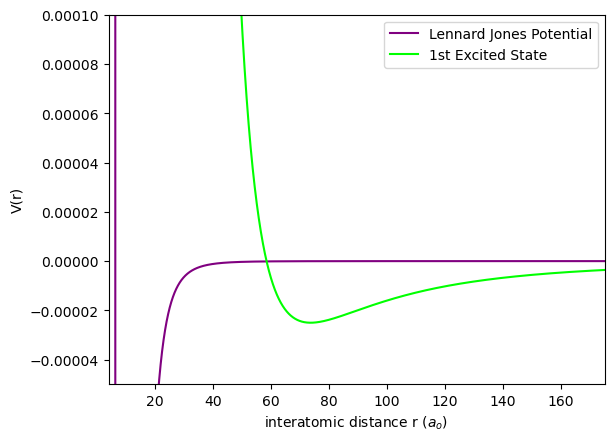

In [1215]:
plt.plot(R_grid, VLJ, color = 'purple', label = 'Lennard Jones Potential')
plt.plot(R_grid, VE1, color = 'lime', label = '1st Excited State')
#plt.plot(R_grid, VE2, color = 'forestgreen', label = '2nd Excited State')
#plt.plot(R_grid, VE3, color = 'mediumseagreen', label = '3rd Excited State')
#plt.plot(R_grid, VE4, color = 'turquoise', label = '4th Excited State')
plt.ylabel('V(r)')
plt.xlabel('interatomic distance r $(a_o)$')
plt.legend()
plt.ylim(-5e-5,10e-5)
plt.xlim(4,175)

In [1217]:
def Numerov(Energy, Num, V_r, dr, grid): # function to find psi(r) continuum state (E>0)
    psi[0] = 0 # impose boundary condition psi(0) = 0
    psi[1] = dr # let psi(1) = the spacing length
    #print(f' psi[1] = {psi[1]}')
    ksq = 2*mu*(Energy - V_r) # wave number squared for the energy
    ksq_p = 2*mu*Energy

    for i in range(2,Num):  # Numerov Algorithm, range is 2 -> N since psi(0), psi(1) already set
        #if i < 100:
           # print(f' first term in numerator is {(2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1])}')
           # print(f' the numerator is {((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))}')
        psi[i] = ((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))/(1 + (1/12)*(dr**2)*ksq[i])
    Psi_f = psi/max(psi) # divide Psi by its largest value to qvoid it becoming too large
    Psi_prime = np.gradient(Psi_f, grid) # find the derivate over the grid r
    
    # Energy Normalization
    A_term = Psi_f[-1]**2
    B_term = Psi_prime[-1]**2
    B_coef = 1/(ksq[-1])
    U_sq = A_term + B_coef*B_term
    U = np.sqrt(U_sq)
    norm_factor = np.sqrt((2*mu)*(1/(np.pi*np.sqrt(ksq[-1]))))
    #print((U,norm_factor))
    
    Psi_Energy_Normalized = (1/U)*(Psi_f)*norm_factor
    
        
    return Psi_Energy_Normalized

In [755]:
def Hamiltonian_DVR_E1(a, b, dx): # DVR method for finding bound states
    N = int((b-a)/dx) # Number of grid points
    ipaper = np.arange(1,N, 1.0) # indexing from the paper, given i = 1,2,...,N-1
    x = a + dx*ipaper # grid from paper
    Vx = C6p1/(x**6) - C3_1/(x**3) # Excited potential
    Vx = np.insert(Vx,0,0) # Insert a 0 at the 0th index of list to account for mismatched indexing

    #print(f' ipaper = {ipaper}')
    #print(f' x = {x}')
    print(f' N - 1 = {N-1}')
    #print(f' len(x) = {len(x)}')
    #print(x[-1]/(b-dx))
    #print(x[0]/(a+dx))
    #print(f' dx = {dx}')
    #print(f'dx from grid  = {x[1] - x[0]}')
    #print(Vx[len(Vx) - 1]/(0.5*(b - dx - d)**2))

    H_DVR = np.zeros((len(x), len(x))) # Initialize empty Hamiltonian matrix of size N-1 x N-1
    Vmat = np.zeros((len(x) + 10, len(x) + 10))
    Tmat = np.zeros((len(x) + 10, len(x) + 10))


    for i in ipaper:
        for j in ipaper:
            if int(i) == int(j): # fill in diagonal components of the Hamiltonian
                prefactorii = (np.pi**2)/(4*mu*(b-a)**2)
                bracketii = ((2*N**2 + 1)/3) - (1/((np.sin(np.pi*(i/N)))**2))
                
                Tmat[int(i)][int(j)] = prefactorii*bracketii
                Vmat[int(i)][int(j)] = Vx[int(j)]
                
                H_DVR[int(i) - 1][int(j) - 1] = Tmat[int(i)][int(j)] + Vmat[int(i)][int(j)]
            
            if i != j: # fill in off-diagonal components of the Hamiltonian
                diff = i - j
                prefactorij = ((-1)**(diff))*(np.pi**2)/(4*mu*(b-a)**2)
                bracketij = (1/((np.sin(np.pi*((diff)/(2*N))))**2)) - (1/((np.sin(np.pi*((i+j)/(2*N))))**2))
                Tmat[int(i)][int(j)] = prefactorij*bracketij               
                
                H_DVR[int(i) - 1][int(j) - 1] = Tmat[int(i)][int(j)]
                
    #assert(np.allclose(H_DVR, np.transpose(H_DVR)))
    #print(f' H = {H}')
    return H_DVR

In [757]:
def Hamiltonian_DVR_E2(a, b, dx): # DVR method for finding bound states
    N = int((b-a)/dx) # Number of grid points
    ipaper = np.arange(1,N, 1.0) # indexing from the paper, given i = 1,2,...,N-1
    x = a + dx*ipaper # grid from paper
    Vx = C6p2/(x**6) - C3_2/(x**3) # Excited potential
    Vx = np.insert(Vx,0,0) # Insert a 0 at the 0th index of list to account for mismatched indexing

    #print(f' ipaper = {ipaper}')
    #print(f' x = {x}')
    print(f' N - 1 = {N-1}')
    #print(f' len(x) = {len(x)}')
    #print(x[-1]/(b-dx))
    #print(x[0]/(a+dx))
    #print(f' dx = {dx}')
    #print(f'dx from grid  = {x[1] - x[0]}')
    #print(Vx[len(Vx) - 1]/(0.5*(b - dx - d)**2))

    H_DVR2 = np.zeros((len(x), len(x))) # Initialize empty Hamiltonian matrix of size N-1 x N-1
    Vmat = np.zeros((len(x) + 10, len(x) + 10))
    Tmat = np.zeros((len(x) + 10, len(x) + 10))


    for i in ipaper:
        for j in ipaper:
            if int(i) == int(j): # fill in diagonal components of the Hamiltonian
                prefactorii = (np.pi**2)/(4*mu*(b-a)**2)
                bracketii = ((2*N**2 + 1)/3) - (1/((np.sin(np.pi*(i/N)))**2))
                
                Tmat[int(i)][int(j)] = prefactorii*bracketii
                Vmat[int(i)][int(j)] = Vx[int(j)]
                
                H_DVR2[int(i) - 1][int(j) - 1] = Tmat[int(i)][int(j)] + Vmat[int(i)][int(j)]
            
            if i != j: # fill in off-diagonal components of the Hamiltonian
                diff = i - j
                prefactorij = ((-1)**(diff))*(np.pi**2)/(4*mu*(b-a)**2)
                bracketij = (1/((np.sin(np.pi*((diff)/(2*N))))**2)) - (1/((np.sin(np.pi*((i+j)/(2*N))))**2))
                Tmat[int(i)][int(j)] = prefactorij*bracketij               
                
                H_DVR2[int(i) - 1][int(j) - 1] = Tmat[int(i)][int(j)]
                
    #assert(np.allclose(H_DVR, np.transpose(H_DVR)))
    #print(f' H = {H}')
    return H_DVR2

In [759]:
def Hamiltonian_DVR_E3(a, b, dx): # DVR method for finding bound states
    N = int((b-a)/dx) # Number of grid points
    ipaper = np.arange(1,N, 1.0) # indexing from the paper, given i = 1,2,...,N-1
    x = a + dx*ipaper # grid from paper
    Vx = C6p3/(x**6) - C3_3/(x**3) # Excited potential
    Vx = np.insert(Vx,0,0) # Insert a 0 at the 0th index of list to account for mismatched indexing

    #print(f' ipaper = {ipaper}')
    #print(f' x = {x}')
    print(f' N - 1 = {N-1}')
    #print(f' len(x) = {len(x)}')
    #print(x[-1]/(b-dx))
    #print(x[0]/(a+dx))
    #print(f' dx = {dx}')
    #print(f'dx from grid  = {x[1] - x[0]}')
    #print(Vx[len(Vx) - 1]/(0.5*(b - dx - d)**2))

    H_DVR3 = np.zeros((len(x), len(x))) # Initialize empty Hamiltonian matrix of size N-1 x N-1
    Vmat = np.zeros((len(x) + 10, len(x) + 10))
    Tmat = np.zeros((len(x) + 10, len(x) + 10))


    for i in ipaper:
        for j in ipaper:
            if int(i) == int(j): # fill in diagonal components of the Hamiltonian
                prefactorii = (np.pi**2)/(4*mu*(b-a)**2)
                bracketii = ((2*N**2 + 1)/3) - (1/((np.sin(np.pi*(i/N)))**2))
                
                Tmat[int(i)][int(j)] = prefactorii*bracketii
                Vmat[int(i)][int(j)] = Vx[int(j)]
                
                H_DVR3[int(i) - 1][int(j) - 1] = Tmat[int(i)][int(j)] + Vmat[int(i)][int(j)]
            
            if i != j: # fill in off-diagonal components of the Hamiltonian
                diff = i - j
                prefactorij = ((-1)**(diff))*(np.pi**2)/(4*mu*(b-a)**2)
                bracketij = (1/((np.sin(np.pi*((diff)/(2*N))))**2)) - (1/((np.sin(np.pi*((i+j)/(2*N))))**2))
                Tmat[int(i)][int(j)] = prefactorij*bracketij               
                
                H_DVR3[int(i) - 1][int(j) - 1] = Tmat[int(i)][int(j)]
                
    #assert(np.allclose(H_DVR, np.transpose(H_DVR)))
    #print(f' H = {H}')
    return H_DVR3

In [761]:
def Hamiltonian_DVR_E4(a, b, dx): # DVR method for finding bound states
    N = int((b-a)/dx) # Number of grid points
    ipaper = np.arange(1,N, 1.0) # indexing from the paper, given i = 1,2,...,N-1
    x = a + dx*ipaper # grid from paper
    Vx = C6p4/(x**6) - C3_4/(x**3) # Excited potential
    Vx = np.insert(Vx,0,0) # Insert a 0 at the 0th index of list to account for mismatched indexing

    #print(f' ipaper = {ipaper}')
    #print(f' x = {x}')
    print(f' N - 1 = {N-1}')
    #print(f' len(x) = {len(x)}')
    #print(x[-1]/(b-dx))
    #print(x[0]/(a+dx))
    #print(f' dx = {dx}')
    #print(f'dx from grid  = {x[1] - x[0]}')
    #print(Vx[len(Vx) - 1]/(0.5*(b - dx - d)**2))

    H_DVR4 = np.zeros((len(x), len(x))) # Initialize empty Hamiltonian matrix of size N-1 x N-1
    Vmat = np.zeros((len(x) + 10, len(x) + 10))
    Tmat = np.zeros((len(x) + 10, len(x) + 10))


    for i in ipaper:
        for j in ipaper:
            if int(i) == int(j): # fill in diagonal components of the Hamiltonian
                prefactorii = (np.pi**2)/(4*mu*(b-a)**2)
                bracketii = ((2*N**2 + 1)/3) - (1/((np.sin(np.pi*(i/N)))**2))
                
                Tmat[int(i)][int(j)] = prefactorii*bracketii
                Vmat[int(i)][int(j)] = Vx[int(j)]
                
                H_DVR4[int(i) - 1][int(j) - 1] = Tmat[int(i)][int(j)] + Vmat[int(i)][int(j)]
            
            if i != j: # fill in off-diagonal components of the Hamiltonian
                diff = i - j
                prefactorij = ((-1)**(diff))*(np.pi**2)/(4*mu*(b-a)**2)
                bracketij = (1/((np.sin(np.pi*((diff)/(2*N))))**2)) - (1/((np.sin(np.pi*((i+j)/(2*N))))**2))
                Tmat[int(i)][int(j)] = prefactorij*bracketij               
                
                H_DVR4[int(i) - 1][int(j) - 1] = Tmat[int(i)][int(j)]
                
    #assert(np.allclose(H_DVR, np.transpose(H_DVR)))
    #print(f' H = {H}')
    return H_DVR4

In [1219]:
r1_i = 1898 # index of r1 in larger grid
r2_i = 14775 # index of r2 in larger grid

r1 = R_grid[r1_i] # 42.5ao, smaller grid starting posistion
r2 = R_grid[r2_i] # 300ao, larger grid ending posistion
print((r1, r2))

N_small = int((r2 - r1)/dr1) # number of points in smaller grid
ipap_p = np.arange(1,N_small, 1.0) # DVR paper indexing for smaller grid
r_grid = r1 + dr1*ipap_p # sub grid to calculate DVR and FC factor on

(42.480000000000004, 300.02)


# Create four Hamiltonians

In [778]:
H1 = Hamiltonian_DVR_E1(r1, r2, dr1) # Hamiltonian to construct excited potential bound states

 N - 1 = 12875


In [779]:
H2 = Hamiltonian_DVR_E2(r1, r2, dr1) # Hamiltonian to construct excited potential bound states

 N - 1 = 12875


In [780]:
H3 = Hamiltonian_DVR_E3(r1, r2, dr1) # Hamiltonian to construct excited potential bound states

 N - 1 = 12875


In [781]:
H4 = Hamiltonian_DVR_E4(r1, r2, dr1) # Hamiltonian to construct excited potential bound states

 N - 1 = 12875


# Find Eigvals, Eigvecs of the four Hamiltonians

In [783]:
# Find eigenvals/vecs of Hamilitonian 1

Heig1 = np.linalg.eigh(H1)[0] # eigenvalues of Hamilitonian
print(f'there are {len(Heig1[Heig1 < 0])} bound states') 

Eigvec1 = np.linalg.eigh(H1)[1]
Hvec1 = []
for i in range(len(H1[0])):
    avec1 = Eigvec1[:,i]
    Hvec1.append(avec1)

there are 69 bound states


In [784]:
# Find eigenvals/vecs of Hamilitonian 2

Heig2 = np.linalg.eigh(H2)[0] # eigenvalues of Hamilitonian
print(f'there are {len(Heig2[Heig2 < 0])} bound states') 

Eigvec2 = np.linalg.eigh(H2)[1]
Hvec2 = []
for i in range(len(H2[0])):
    avec2 = Eigvec2[:,i]
    Hvec2.append(avec2)

there are 64 bound states


In [785]:
# Find eigenvals/vecs of Hamilitonian 3

Heig3 = np.linalg.eigh(H3)[0] # eigenvalues of Hamilitonian
print(f'there are {len(Heig3[Heig3 < 0])} bound states') 

Eigvec3 = np.linalg.eigh(H3)[1]
Hvec3 = []
for i in range(len(H3[0])):
    avec3 = Eigvec3[:,i]
    Hvec3.append(avec3)

there are 85 bound states


In [786]:
# Find eigenvals/vecs of Hamilitonian 4

Heig4 = np.linalg.eigh(H4)[0] # eigenvalues of Hamilitonian
print(f'there are {len(Heig4[Heig4 < 0])} bound states') 

Eigvec4 = np.linalg.eigh(H4)[1]
Hvec4 = []
for i in range(len(H4[0])):
    avec4 = Eigvec4[:,i]
    Hvec4.append(avec4)

there are 59 bound states


# Normalize Eigvecs

In [1421]:
# Normalize eigenvectors
comparison_n = 51

for i in range(comparison_n):
    INT1 = np.trapz(np.abs(Hvec1[i])**2,r_grid)
    A1 = 1/np.sqrt(INT1)
    Hvec1[i] = A1*Hvec1[i]

for i in range(comparison_n):
    INT2 = np.trapz(np.abs(Hvec2[i])**2,r_grid)
    A2 = 1/np.sqrt(INT2)
    Hvec2[i] = A2*Hvec2[i]

for i in range(comparison_n):
    INT3 = np.trapz(np.abs(Hvec3[i])**2,r_grid)
    A3 = 1/np.sqrt(INT3)
    Hvec3[i] = A3*Hvec3[i]

for i in range(comparison_n):
    INT4 = np.trapz(np.abs(Hvec4[i])**2,r_grid)
    A4 = 1/np.sqrt(INT4)
    Hvec4[i] = A4*Hvec4[i]

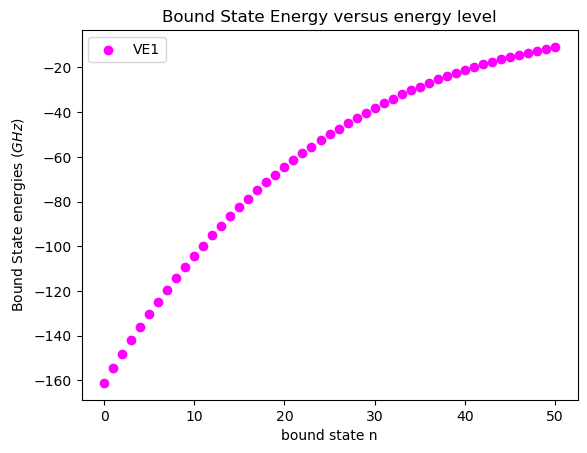

In [1358]:
comparison_n = 51
N_ranges = np.arange(0,comparison_n,1)
plt.scatter(N_ranges, H_to_GHz*Heig1[0:comparison_n], color = 'fuchsia', label = 'VE1')
#plt.scatter(N_ranges, H_to_GHz*Heig2[0:comparison_n], color = 'deeppink', label = 'VE2')
#plt.scatter(N_ranges, H_to_GHz*Heig3[0:comparison_n], color = 'crimson', label = 'VE3')
#plt.scatter(N_ranges, H_to_GHz*Heig4[0:comparison_n], color = 'lightpink', label = 'VE4')

plt.ylabel('Bound State energies $ (GHz) $')
plt.xlabel('bound state n')
plt.title('Bound State Energy versus energy level')
plt.legend()

In [1360]:
def Sigma_PA_res(n, index): # finds the resonant photoassociation cross section, returns cross section and Gamma
    sigma_list = []
    Gamma_list = []
    Sigma_small = []
    VLJ_PA = (C12_coefs[index]/(R_grid**12)) - (C6/(R_grid**6))
    Psi_S = Numerov(Eo, N_big - 1, VLJ_PA, dr1, R_grid)
    Gamma0 = 100*gamma
    FC0 = np.abs(np.trapz(np.conjugate(Hvec1[0])*Psi_S[r1_i + 1:r2_i - 1], r_grid))**2
    U_sq = Gamma0/(2*np.pi*FC0)
    for i in range(n):
        FC_n = np.abs(np.trapz(np.conjugate(Hvec1[i])*Psi_S[r1_i + 1:r2_i - 1], r_grid))**2
        Gamma_n = Gamma = 2*np.pi*U_sq*FC_n
        if i == 0:
            print(f' Gamma0 = {Gamma_n}')
        Gamma_list.append(Gamma_n)
        sigma_n = (4*gamma*Gamma_n)/((gamma + Gamma_n)**2)
        sigma_list.append(sigma_n)
        smegma_small = (4*Gamma)/(gamma)
    return((sigma_list,Gamma_list))

In [1362]:
def Sigma_PA_detuning(Detuning, index, Hamiltonian_eigvals_eigvecs, Collision_E, Bound_State_n):
    
    VLJ_PA = (C12_coefs[index]/(R_grid**12)) - (C6/(R_grid**6))
    Psi_Scattering = Numerov(Eo, N_big - 1, VLJ_PA, dr1, R_grid)
    wave_num_sq = 2*mu*Eo

    K_N = []
    
    Bound_Eigen_energies = Hamiltonian_eigvals_eigvecs[0][0] # collect all eigenvalues of the ith Hamiltonian
    Bound_Eigen_vecs = Hamiltonian_eigvals_eigvecs[0][1] # collect all eigenvectors of the ith Hamiltonian
    for i in range(len(Bound_Eigen_vecs)):
        Bound_Eigen_vecs[i] = H_to_GHz*Bound_Eigen_vecs[i]
    
    Gamma0 = 100*gamma
    FC0 = np.abs(np.trapz(np.conjugate(Bound_Eigen_vecs[0])*Psi_Scattering[r1_i + 1:r2_i - 1], r_grid))**2
    U_sqd = Gamma0/(2*np.pi*FC0)
    #print(f'U^2 = {U_squared}')

    #for i in range(len(Bound_States)):
    for i in range(comparison_n):
        if i == Bound_State_n:
            FC_n = np.abs(np.trapz(np.conjugate(Bound_Eigen_vecs[i])*Psi_Scattering[r1_i + 1:r2_i - 1], r_grid))**2
            Gamma_n = 2*np.pi*U_sqd*FC_n
            A_Gamma_Val = Gamma_n
            #plt.hlines(Gamma_n, -Gamma_n,Gamma_n, color = 'black')
            #print(f'n = {i}, Gamma/gamma = {Gamma_n/gamma}')
            print(f'n = {i}, Gamma = {Gamma_n}')
        
            Kn_num = -1*(Gamma_n*0.5)
        #print(f'Kn numerator = {Kn_num}')
        #Delta = omega_range - Bound_Eigen_energies[i]
        #print(f' Delta[0] = {Delta[0]}')
            Kn_den = (H_to_GHz*Collision_E - Detuning) + I*gamma*0.5
        #print(f'Kn denominator = {Kn_den}')
            Kn = np.array((Kn_num/Kn_den))
        #print(f'n= {i}, Kn = {Kn}')
            K_N.append(Kn)

    K = sum(K_N)
    #plt.plot(omega_range,np.imag(K), color = 'purple')
    #print(f'K = Sum(K) = {K}')
    
    S_num = 1 + I*K
    #print(f'S numerator = {S_num}')
    S_den = 1 + -1*I*K
    #print(f'S denominator = {S_den}')
    S = S_num/S_den
    #print(f'S = {S}')
    S_prob = 1 - np.absolute(S)**2
    #print(f' |S|^2 = {np.absolute(S)**2}')
    print(f'1 - |S|^2 = {S_prob}')

    #Sigma_PA_2 = (np.pi/wave_num_sq)*(S_prob)
    Sigma_PA_2 = (S_prob)
    
    
    return(Sigma_PA_2, A_Gamma_Val)

In [1414]:
def Sigma_PA_hw(omega_range, index, Hamiltonian_eigvals_eigvecs, Collision_E): # calculate cross section over a range of laser frequencies
    
    VLJ_PA = (C12_coefs[index]/(R_grid**12)) - (C6/(R_grid**6))
    Psi_Scattering = Numerov(Eo, N_big - 1, VLJ_PA, dr1, R_grid)
    wave_num_sq = 2*mu*Eo
    
    Bound_Eigen_energies = [ [] for i in range(len(Hamiltonian_eigvals_eigvecs)) ]
    #print(Bound_Eigen_energies)
    Bound_Eigen_vecs = [ [] for i in range(len(Hamiltonian_eigvals_eigvecs)) ]
    #print(Bound_Eigen_vecs)
    K_N = []

    for i in range(len(Hamiltonian_eigvals_eigvecs)):
        #print(i)
        for j in range(comparison_n):
            #print(comparison_n)
            Bound_Eigen_energies[i].append(Hamiltonian_eigvals_eigvecs[i][0][j]) # collect all eigenvalues of the ith Hamiltonian
            Bound_Eigen_vecs[i].append(Hamiltonian_eigvals_eigvecs[i][1][j]) # collect all eigenvectors of the ith Hamiltonian
    for i in range(len(Hamiltonian_eigvals_eigvecs)):
        for j in range(len(Bound_Eigen_energies[i])):
            Bound_Eigen_energies[i][j] = H_to_GHz*Bound_Eigen_energies[i][j]
    #print(Bound_Eigen_energies[0])
    #print(Bound_Eigen_energies[1])
    
    Gamma0 = 100*gamma
    FC0 = np.abs(np.trapz(np.conjugate(Bound_Eigen_vecs[0][0])*Psi_Scattering[r1_i + 1:r2_i - 1], r_grid))**2
    U_squared = Gamma0/(2*np.pi*FC0)
    #print(f'U^2 = {U_squared}')

    for i in range(len(Hamiltonian_eigvals_eigvecs)):
        if i <= 10:
            for j in range(comparison_n):
           # if  j == 1 or j == 3:
                if  j <= 300:
                    FC_n = np.abs(np.trapz(np.conjugate(Bound_Eigen_vecs[i][j])*Psi_Scattering[r1_i + 1:r2_i - 1], r_grid))**2
                    Gamma_n = 2*np.pi*U_squared*FC_n
                    A_Gamma_Val = Gamma_n
        #plt.hlines(Gamma_n, -Gamma_n,Gamma_n, color = 'black')
        #print(f'n = {i}, Gamma/gamma = {Gamma_n/gamma}')
                    #print(f'VE{i}, n = {j}, Gamma = {Gamma_n}, Eb = {Bound_Eigen_energies[i][j]}')
        
                    Kn_num = -1*(Gamma_n*0.5)
        #print(f'Kn numerator = {Kn_num}')
        #Delta = omega_range - Bound_Eigen_energies[i]
        #print(f' Delta[0] = {Delta[0]}')
                    Detuning = (omega_range - Bound_Eigen_energies[i][j])
                    Kn_den = (H_to_GHz*Collision_E - Detuning) + I*gamma*0.5
        #print(f'Kn denominator = {Kn_den}')
                    Kn = np.array((Kn_num/Kn_den))
        #print(f'n= {i}, Kn = {Kn}')
                    K_N.append(Kn)

    K = sum(K_N)
    #plt.plot(omega_range,np.imag(K), color = 'purple')
    #print(f'K = Sum(K) = {K}')
    
    S_num = 1 + I*K
    #print(f'S numerator = {S_num}')
    S_den = 1 + -1*I*K
    #print(f'S denominator = {S_den}')
    S = S_num/S_den
    #print(f'S = {S}')
    S_prob = 1 - np.absolute(S)**2
    #print(f' |S|^2 = {np.absolute(S)**2}')
   # print(f'1 - |S|^2 = {S_prob}')

    #Sigma_PA_2 = (np.pi/wave_num_sq)*(S_prob)
    Sigma_PA_frequency = (S_prob)
    
    
    return(Sigma_PA_frequency, A_Gamma_Val)

# Cross section vs detuning\laser frequency for one potential

n = 0, Gamma = 10.0
1 - |S|^2 = [0.00039596 0.00039608 0.0003962  ... 0.0003962  0.00039608 0.00039596]


Text(0.5, 1.0, 'PA cross section vs Detuning')

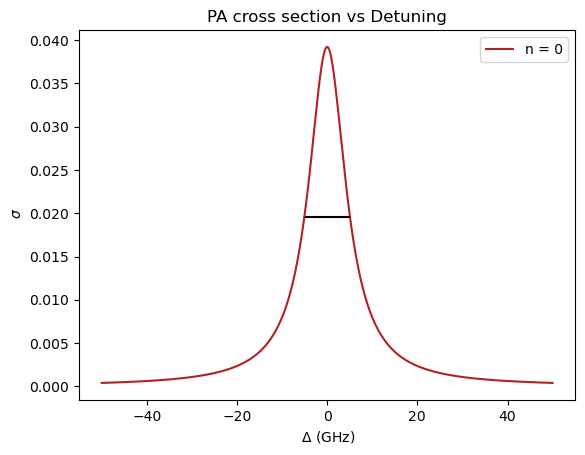

In [1417]:
Delta_1 = np.linspace(-50,50, len(r_grid))
H_E1 = [[Heig1,Hvec1]]
Bound_States = np.arange(0, comparison_n, 1.0)
#print(Heig[0])
#print(Heig[50])
#print(Bound_States)
#print(I)
My_Bound_State = 0


Sigma_S = Sigma_PA_detuning(Delta_1, 1211,  H_E1, Eo, My_Bound_State)
plt.plot(Delta_1, Sigma_S[0], color = 'firebrick', label = f'n = {My_Bound_State}')
#print(Sigma_S)

plt.hlines(0.5*max(Sigma_S[0]), -0.5*Sigma_S[1], 0.5*Sigma_S[1], color = 'black')

#plt.xlim(Omega_1[0], Omega_1[-1])
#plt.ylim(min(Sigma_S), max(Sigma_S))
plt.xlabel(' $ \\Delta $ (GHz) ')
plt.ylabel(' $ \\sigma $')
plt.legend()
plt.title('PA cross section vs Detuning')

Text(0.5, 1.0, 'PA cross section vs Laser Frequency')

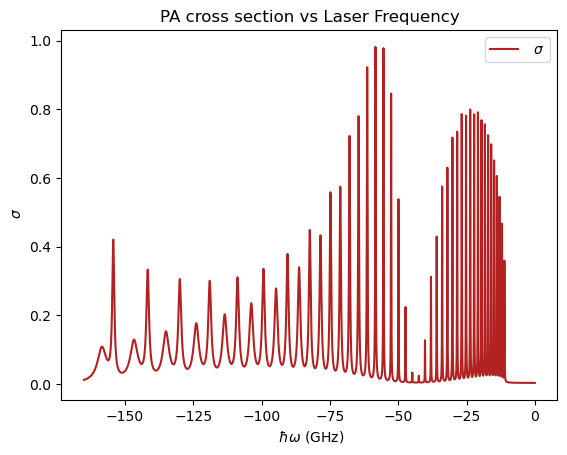

In [1368]:

#H_E1 = [[Heig,Hvec]]
#Omega_1 = np.linspace(0, 1e12, len(r_grid))
#Omega_1 = np.linspace(0, 1e9, len(r_grid))
Omega_1 = np.linspace(-165,0, len(r_grid))
#Omega_1 = np.linspace(-145,-135, len(r_grid))

#print(Heig[0])
#print(Heig[50])
#print(Bound_States)
#print(I)
#Sigma_on_res = Sigma_PA_res(comparison_n, 622)[0]
#Sigma_Interpolate = np.interp(Omega_1, Bound_States, Sigma_on_res)
Sigma_Shw = Sigma_PA_hw(Omega_1, 522,  H_E1, Eo)
plt.plot(Omega_1, Sigma_Shw[0], color = 'firebrick', label = f' $\\sigma$')
#plt.plot(r_grid, Sigma_Interpolate, color = 'goldenrod', label = ' $\\sigma_{res}$')
#print(Sigma_S)
#print(H_to_GHz*(Eo + Heig[0]))
#print(H_to_GHz*(Eo + Heig[1]))
#print(H_to_GHz*(Eo + Heig[2]))
#plt.hlines(0.5*max(Sigma_Shw[0]), -0.5*Sigma_Shw[1], 0.5*Sigma_Shw[1], color = 'black')

#plt.xlim(Omega_1[0], Omega_1[-1])
#plt.ylim(min(Sigma_S), max(Sigma_S))
plt.xlabel(' $ \\hbar \\omega $ (GHz)')
plt.ylabel(' $ \\sigma $')
plt.legend()
plt.title('PA cross section vs Laser Frequency')

# Multiple Potential Wells

In [1370]:
Bound_States = np.arange(0,comparison_n,1)

In [1372]:
I = cmath.sqrt(-1)
H_vals_2 = [[Heig1,Hvec1], [Heig2,Hvec2]]
H_vals_4 = [[Heig1,Hvec1], [Heig2,Hvec2], [Heig3,Hvec3], [Heig4,Hvec4]]


In [1377]:
print(H_to_GHz*Eo)
print(f' VE1 2 = {H_to_GHz*Heig1[2]} GHz')
print(f' VE1 3 = {H_to_GHz*Heig1[3]} GHz')
print(f' VE2 0 = {H_to_GHz*Heig2[0]} GHz')
print(f' VE2 1 = {H_to_GHz*Heig2[1]} GHz')

2.083661763613064e-05
 VE1 2 = -148.19012937239805 GHz
 VE1 3 = -142.0355311954609 GHz
 VE2 0 = -128.79631515279098 GHz
 VE2 1 = -123.34670569720349 GHz


In [1379]:
print(Hvec1[1])

[-1.40556435e-11 -2.72233275e-11 -2.85914751e-11 ... -4.38278419e-08
 -2.90322028e-08 -1.40814215e-08]


# Two Excited Potentials

# Ground State --- Lennard-Jones
#### $V(r) = \frac{C_{12}}{r^{12}} - \frac{C_{6}}{r^{6}}$
#### $C_{12} = 3.05\times10^{8} E_{h}a_{0}^{12}$, $C_{6} = 4710 E_{h}a_{0}^6$

#  $ 1^{st} $ Excited State --- C3 thing 
## $V_{E1}(r) = \frac{C_{6}'}{r^{6}} - \frac{C_{3}}{r^{3}}$
## $C_{6}' = 4\times10^{6} E_{h}a_{0}^6$, $C_{3} = 20 E_{h}a_{0}^3$

#  $ 2^{nd} $ Excited State --- C3 thing 2
## $V_{E2}(r) = \frac{C_{6}''}{r^{6}} - \frac{C_{3}}{r^{3}}$
## $C_{6}'' = 5\times10^{6} E_{h}a_{0}^6$, $C_{3} = 20 E_{h}a_{0}^3$

(40.0, 300.0)

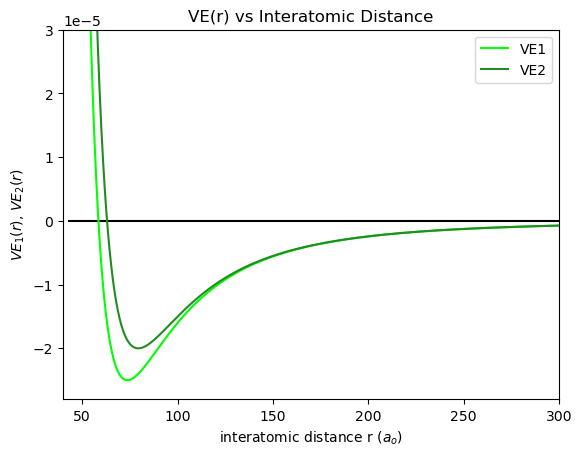

In [1383]:
# Plot scaled eigenvectors + eigenvalues on top of potential
plt.hlines(0, r1, R2, color = 'black')
V1excited = C6p1/(r_grid**6) - C3_1/(r_grid**3) 
plt.plot(r_grid, V1excited, color = 'lime', label = 'VE1')
V2excited = C6p2/(r_grid**6) - C3_2/(r_grid**3) 
plt.plot(r_grid, V2excited, color = 'forestgreen', label = 'VE2')
plt.ylabel('$VE_1(r)$, $VE_2(r)$')
plt.xlabel('interatomic distance r $(a_o)$')
plt.title('VE(r) vs Interatomic Distance')
plt.legend()
#plt.legend()
plt.ylim(-2.8e-5,3e-5)
plt.xlim(40,300)

(40.0, 300.0)

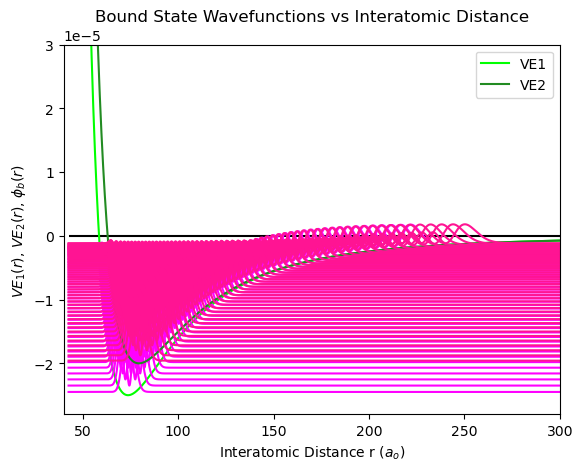

In [1429]:
# Plot scaled eigenvectors + eigenvalues on top of potential
comparison_n = 51
plt.hlines(0, r1, R2, color = 'black')
V1excited = C6p1/(r_grid**6) - C3_1/(r_grid**3) 
plt.plot(r_grid, V1excited, color = 'lime', label = 'VE1')


for i in range(len(Heig1[Heig1 < 0])):
 #   if i % 5 == 0:
  #      plt.plot(rp, 0.0005*np.abs(Hvec[i])**2 + Heig[i])
    if i <= comparison_n:
        plt.plot(r_grid, 0.0001*np.abs(Hvec1[i])**2 + Heig1[i], color = 'fuchsia')

V2excited = C6p2/(r_grid**6) - C3_2/(r_grid**3) 
plt.plot(r_grid, V2excited, color = 'forestgreen', label = 'VE2')

for i in range(len(Heig2[Heig2 < 0])):
 #   if i % 5 == 0:
  #      plt.plot(rp, 0.0005*np.abs(Hvec[i])**2 + Heig[i])
    if i < comparison_n:
        plt.plot(r_grid, 0.0001*np.abs(Hvec2[i])**2 + Heig2[i], color = 'deeppink')

#V3excited = C6p3/(r_grid**6) - C3_3/(r_grid**3) 
#plt.plot(r_grid, V3excited, color = 'mediumseagreen')

#for i in range(len(Heig3[Heig3 < 0])):
 #   if i % 5 == 0:
  #      plt.plot(rp, 0.0005*np.abs(Hvec[i])**2 + Heig[i])
#    if i < comparison_n:
#        plt.plot(r_grid, 0.0001*np.abs(Hvec3[i])**2 + Heig3[i], color = 'crimson', label = f'np = {i}')

#V4excited = C6p4/(r_grid**6) - C3_4/(r_grid**3) 
#plt.plot(r_grid, V4excited, color = 'turquoise')

#for i in range(len(Heig4[Heig4 < 0])):
 #   if i % 5 == 0:
  #      plt.plot(rp, 0.0005*np.abs(Hvec[i])**2 + Heig[i])
 #  if i < comparison_n:
  #      plt.plot(r_grid, 0.0001*np.abs(Hvec4[i])**2 + Heig4[i], color = 'lightpink', label = f'np = {i}')

plt.ylabel('$VE_1(r)$, $VE_2(r)$, $ \\phi_b(r) $ ')
plt.xlabel('Interatomic Distance r $(a_o)$')
plt.title('Bound State Wavefunctions vs Interatomic Distance')
plt.legend()
#plt.legend()
plt.ylim(-2.8e-5,3e-5)
plt.xlim(40,300)
#plt.xlim(50,70)
#print(Heig1[0:30])

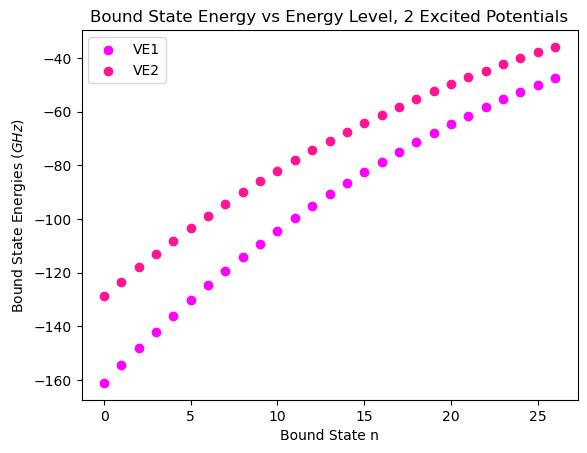

In [1385]:
comparison_n = 27
N_ranges = np.arange(0,comparison_n,1)
plt.scatter(N_ranges, H_to_GHz*Heig1[0:comparison_n], color = 'fuchsia', label = 'VE1')
plt.scatter(N_ranges, H_to_GHz*Heig2[0:comparison_n], color = 'deeppink', label = 'VE2')
#plt.scatter(N_ranges, H_to_GHz*Heig3[0:comparison_n], color = 'crimson', label = 'VE3')
#plt.scatter(N_ranges, H_to_GHz*Heig4[0:comparison_n], color = 'lightpink', label = 'VE4')

plt.ylabel('Bound State Energies $ (GHz) $')
plt.xlabel('Bound State n')
plt.title('Bound State Energy vs Energy Level, 2 Excited Potentials')
plt.legend()

Text(0.5, 1.0, 'PA Cross Section vs Laser Frequency')

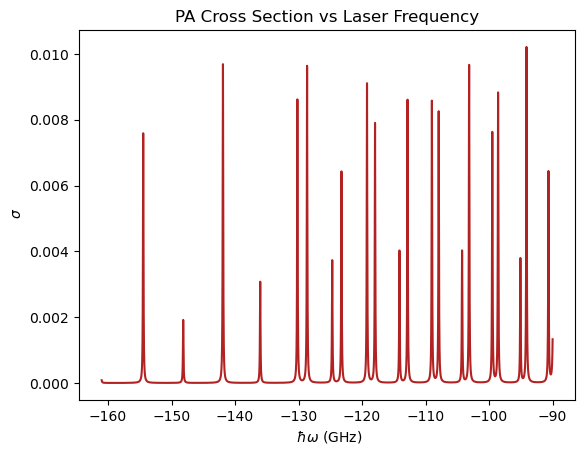

In [1431]:
psi = np.zeros(len(R_grid))
comparison_n = len(Bound_States)
gamma = 0.1
#H_E1 = [[Heig,Hvec]]
#Omega_1 = np.linspace(0, 1e12, len(r_grid))
#Omega_1 = np.linspace(0, 1e9, len(r_grid))
Omega_1 = np.linspace(-161,-90, len(r_grid))


#print(Heig[0])
#print(Heig[50])
#print(Bound_States)
#print(I)

Sigma_hw_2 = Sigma_PA_hw(Omega_1, 1211,  H_vals_2, Eo)
plt.plot(Omega_1, Sigma_hw_2[0], color = 'firebrick')

#print(Sigma_S)

#plt.hlines(0.5*max(Sigma_Shw[0]), -0.5*Sigma_Shw[1], 0.5*Sigma_Shw[1], color = 'black')

#plt.xlim(Omega_1[0], Omega_1[-1])
#plt.ylim(min(Sigma_S), max(Sigma_S))
plt.xlabel(' $ \\hbar \\omega $ (GHz)')
plt.ylabel(' $ \\sigma $')
plt.title('PA Cross Section vs Laser Frequency')

# Four Excited Potentials

# Ground State --- Lennard-Jones
#### $V(r) = \frac{C_{12}}{r^{12}} - \frac{C_{6}}{r^{6}}$
#### $C_{12} = 3.05\times10^{8} E_{h}a_{0}^{12}$, $C_{6} = 4710 E_{h}a_{0}^6$

#  $ 1^{st} $ Excited State --- C3 thing 
## $V_E(r) = \frac{C_{6}'}{r^{6}} - \frac{C_{3}}{r^{3}}$
## $C_{6}' = 4\times10^{6} E_{h}a_{0}^6$, $C_{3} = 20 E_{h}a_{0}^3$

#  $ 2^{nd} $ Excited State --- C3 thing 2
## $V_E(r) = \frac{C_{6}''}{r^{6}} - \frac{C_{3}}{r^{3}}$
## $C_{6}'' = 5\times10^{6} E_{h}a_{0}^6$, $C_{3} = 20 E_{h}a_{0}^3$

#  $ 3^{rd} $ Excited State --- C3 thing 3
## $V_E(r) = \frac{C_{6}'''}{r^{6}} - \frac{C_{3}'''}{r^{3}}$
## $C_{6}''' = 3.6\times10^{6} E_{h}a_{0}^6$, $C_{3}''' = 25 E_{h}a_{0}^3$

#  $ 4^{th} $ Excited State --- C3 thing 4
## $V_E(r) = \frac{C_{6}''''}{r^{6}} - \frac{C_{3}''''}{r^{3}}^3$
## $C_{6}'''' = 4.2\times10^{6} E_{h}a_{0}^6$, $C_{3}'''' = 17 E_{h}a_{0}^3$

(40.0, 300.0)

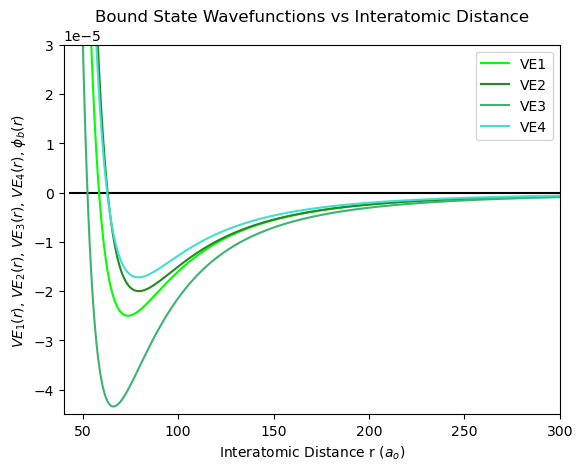

In [1435]:
plt.hlines(0, r1, R2, color = 'black')
V1excited = C6p1/(r_grid**6) - C3_1/(r_grid**3) 
plt.plot(r_grid, V1excited1, color = 'lime', label = 'VE1')
V2excited = C6p2/(r_grid**6) - C3_2/(r_grid**3) 
plt.plot(r_grid, V2excited, color = 'forestgreen', label = 'VE2')
V3excited = C6p3/(r_grid**6) - C3_3/(r_grid**3) 
plt.plot(r_grid, V3excited, color = 'mediumseagreen', label = 'VE3')
V4excited = C6p4/(r_grid**6) - C3_4/(r_grid**3) 
plt.plot(r_grid, V4excited, color = 'turquoise', label = 'VE4')
plt.ylabel('$VE_1(r)$, $VE_2(r)$, $VE_3(r)$, $VE_4(r)$, $ \\phi_b(r) $ ')
plt.xlabel('Interatomic Distance r $(a_o)$')
plt.title('Bound State Wavefunctions vs Interatomic Distance')
plt.legend()
#plt.legend()
plt.ylim(-4.5e-5,3e-5)
plt.xlim(40,300)

(40.0, 300.0)

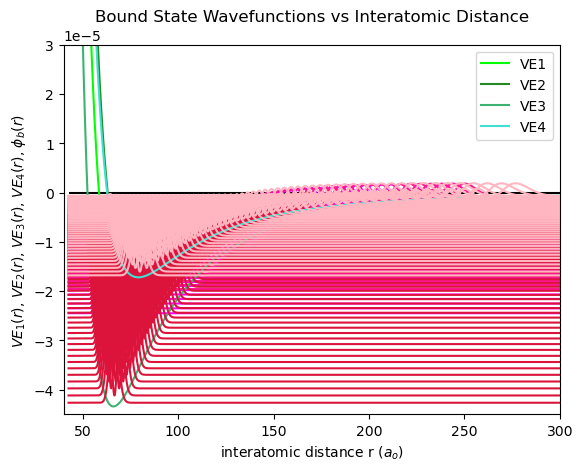

In [1437]:
# Plot scaled eigenvectors + eigenvalues on top of potential
plt.hlines(0, r1, R2, color = 'black')
V1excited = C6p1/(r_grid**6) - C3_1/(r_grid**3) 
plt.plot(r_grid, V1excited1, color = 'lime', label = 'VE1')


for i in range(len(Heig1[Heig1 < 0])):
 #   if i % 5 == 0:
  #      plt.plot(rp, 0.0005*np.abs(Hvec[i])**2 + Heig[i])
    if i <= comparison_n:
        plt.plot(r_grid, 0.0001*np.abs(Hvec1[i])**2 + Heig1[i], color = 'fuchsia')

V2excited = C6p2/(r_grid**6) - C3_2/(r_grid**3) 
plt.plot(r_grid, V2excited, color = 'forestgreen', label = 'VE2')

for i in range(len(Heig2[Heig2 < 0])):
 #   if i % 5 == 0:
  #      plt.plot(rp, 0.0005*np.abs(Hvec[i])**2 + Heig[i])
    if i <= comparison_n:
        plt.plot(r_grid, 0.0001*np.abs(Hvec2[i])**2 + Heig2[i], color = 'deeppink')

V3excited = C6p3/(r_grid**6) - C3_3/(r_grid**3) 
plt.plot(r_grid, V3excited, color = 'mediumseagreen', label = 'VE3')

for i in range(len(Heig3[Heig3 < 0])):
 #   if i % 5 == 0:
  #      plt.plot(rp, 0.0005*np.abs(Hvec[i])**2 + Heig[i])
    if i <= comparison_n:
        plt.plot(r_grid, 0.0001*np.abs(Hvec3[i])**2 + Heig3[i], color = 'crimson')

V4excited = C6p4/(r_grid**6) - C3_4/(r_grid**3) 
plt.plot(r_grid, V4excited, color = 'turquoise', label = 'VE4')

for i in range(len(Heig4[Heig4 < 0])):
 #   if i % 5 == 0:
  #      plt.plot(rp, 0.0005*np.abs(Hvec[i])**2 + Heig[i])
   if i <= comparison_n:
        plt.plot(r_grid, 0.0001*np.abs(Hvec4[i])**2 + Heig4[i], color = 'lightpink')

plt.ylabel('$VE_1(r)$, $VE_2(r)$, $VE_3(r)$, $VE_4(r)$, $ \\phi_b(r) $ ')
plt.xlabel('interatomic distance r $(a_o)$')
plt.title('Bound State Wavefunctions vs Interatomic Distance')
plt.legend()
#plt.legend()
plt.ylim(-4.5e-5,3e-5)
plt.xlim(40,300)
#plt.xlim(50,70)
#print(Heig1[0:30])

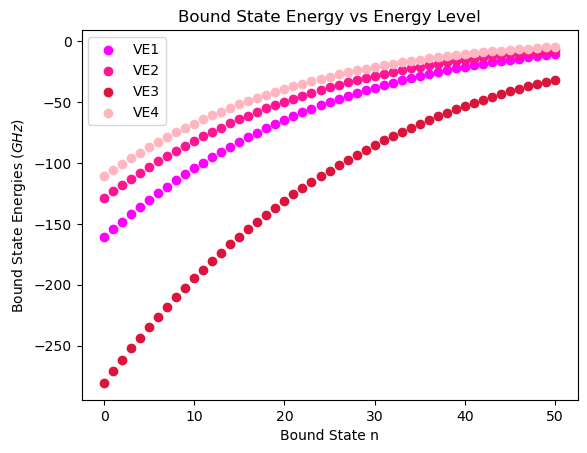

In [1439]:
comparison_n = 51
N_ranges = np.arange(0,comparison_n,1)
plt.scatter(N_ranges, H_to_GHz*Heig1[0:comparison_n], color = 'fuchsia', label = 'VE1')
plt.scatter(N_ranges, H_to_GHz*Heig2[0:comparison_n], color = 'deeppink', label = 'VE2')
plt.scatter(N_ranges, H_to_GHz*Heig3[0:comparison_n], color = 'crimson', label = 'VE3')
plt.scatter(N_ranges, H_to_GHz*Heig4[0:comparison_n], color = 'lightpink', label = 'VE4')

plt.ylabel('Bound State Energies $ (GHz) $')
plt.xlabel('Bound State n')
plt.title('Bound State Energy vs Energy Level')
plt.legend()

Text(0.5, 1.0, 'PA Cross Section vs Laser Frequency')

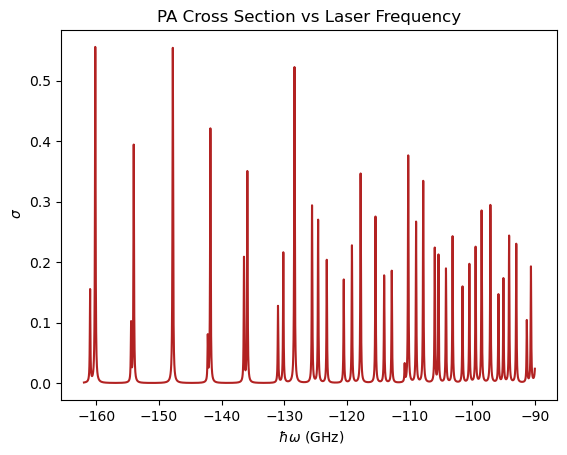

In [1441]:
psi = np.zeros(len(R_grid))
comparison_n = len(Bound_States)
gamma = 0.1
#H_E1 = [[Heig,Hvec]]
Omega_1 = np.linspace(-162,-90, len(r_grid))
#Omega_1 = np.linspace(-102,-98, len(r_grid))
#Omega_1 = np.linspace(-53,-50, len(r_grid))


#print(Heig[0])
#print(Heig[50])
#print(Bound_States)
#print(I)

Sigma_hw_4 = Sigma_PA_hw(Omega_1, 988,  H_vals_4, Eo)
plt.plot(Omega_1, Sigma_hw_4[0], color = 'firebrick')

#print(Sigma_S)

#plt.hlines(0.5*max(Sigma_Shw[0]), -0.5*Sigma_Shw[1], 0.5*Sigma_Shw[1], color = 'black')

#plt.xlim(Omega_1[0], Omega_1[-1])
#plt.ylim(min(Sigma_S), max(Sigma_S))
plt.xlabel(' $ \\hbar \\omega $ (GHz)')
plt.ylabel(' $ \\sigma $')
plt.title('PA Cross Section vs Laser Frequency')

In [1443]:
rising_a_indexes = []
RA_indexes = []
Key_As = np.arange(0,1100, 100)
for i in range(len(Key_As)):
    for j in range(len(scattering_lengths)):
        if abs(scattering_lengths[j] - Key_As[i]) <= 10:
            rising_a_indexes.append(j)
#print(rising_a_indexes)
#for index in rising_a_indexes:
#    print(scattering_lengths[index])
#for i in range(len(scattering_lengths)):
#    if abs(scattering_lengths[i] - 50) <= 1:
#        print(i)




In [1445]:
#print(scattering_lengths[rising_a_indexes[120]])
print(scattering_lengths[156])

#RA_indexes = [rising_a_indexes[50],rising_a_indexes[147],rising_a_indexes[204],rising_a_indexes[226],rising_a_indexes[236],rising_a_indexes[242],rising_a_indexes[246],rising_a_indexes[248],rising_a_indexes[250],rising_a_indexes[251],rising_a_indexes[253]]
RA_indexes = [rising_a_indexes[50],156,rising_a_indexes[147],rising_a_indexes[204],rising_a_indexes[242],rising_a_indexes[253]]

50.03758544601891


In [1447]:
for i in RA_indexes:
    print(scattering_lengths[i])

0.05957401838649711
50.03758544601891
99.95208422470142
200.3202104759662
500.4105000026625
1007.4730169344892


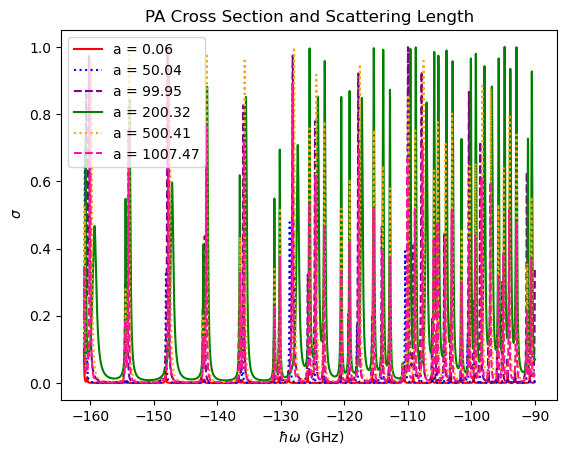

In [1453]:
Omega_variedA = np.linspace(-161,-90, len(r_grid))
#Omega_variedA = np.linspace(-96,-93, len(r_grid))
Sigma_variedA = []

for i in range(len(RA_indexes)):
    A_R_Sigma = Sigma_PA_hw(Omega_variedA, RA_indexes[i],  H_vals_4, Eo)
    Sigma_variedA.append(A_R_Sigma[0])

plt.plot(Omega_variedA, Sigma_variedA[0], color = 'red', label = f'a = {round(scattering_lengths[RA_indexes[0]],2)}')
plt.plot(Omega_variedA, Sigma_variedA[1], color = 'blue', linestyle = ':', label = f'a = {round(scattering_lengths[RA_indexes[1]],2)}')
plt.plot(Omega_variedA, Sigma_variedA[2], color = 'purple', linestyle = '--', label = f'a = {round(scattering_lengths[RA_indexes[2]],2)}')
plt.plot(Omega_variedA, Sigma_variedA[3], color = 'green', linestyle = '-', label = f'a = {round(scattering_lengths[RA_indexes[3]],2)}')
plt.plot(Omega_variedA, Sigma_variedA[4], color = 'orange', linestyle = ':', label = f'a = {round(scattering_lengths[RA_indexes[4]],2)}')
plt.plot(Omega_variedA, Sigma_variedA[5], color = 'deeppink', linestyle = '--', label = f'a = {round(scattering_lengths[RA_indexes[5]],2)}')


plt.xlabel(' $ \\hbar \\omega $ (GHz)')
plt.ylabel(' $ \\sigma $')
plt.title('PA Cross Section and Scattering Length')

plt.legend()

In [1398]:
#for i in range(len(scattering_lengths))

[105, 1016]


Text(0.5, 1.0, 'PA Cross Section vs Bound State n for Random Scattering Lengths')

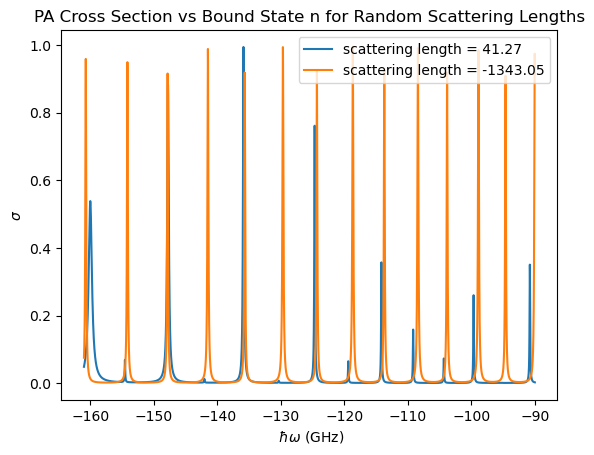

In [1399]:
Omega_rand = np.linspace(-161,-90, len(r_grid))
import random
random_C12 = [random.randint(0,len(C12_coefs)),random.randint(0,len(C12_coefs))]
print(random_C12)
for i in range(len(random_C12)):
    #if i <= 3:

    SigmaPA_rand = Sigma_PA_hw(Omega_rand, random_C12[i],  H_vals_4, Eo)[0]
    #Gamma_rand = Sigma_PA_res(comparison_n,random_C12[i])[1]

    plt.plot(Omega_rand, SigmaPA_rand, label = f'scattering length = {round(scattering_lengths[random_C12[i]],2)}')
    #plt.plot(Bound_States, Gamma_rand, label = f'scattering length = {round(scattering_lengths[random_C12[i]],3)}')
    
plt.xlabel(' $ \\hbar \\omega $ (GHz)')
plt.ylabel('$\\sigma$')
plt.legend()
plt.title('PA Cross Section vs Bound State n for Random Scattering Lengths')